In [21]:
# Importar dependencias

# La librería JSON permite abrir y guardar archivos en formato JSON
import json
# Sklearn cuenta con una herramienta para dividir un dataset
# en un subconjunto de entrenamiento y un subconjunto de evaluación
# Ambos, son importantes para el trabajo con aprendizaje automatico
from sklearn.model_selection import train_test_split
# os es una librería propia de Python que permite precesar archivos
import os
# La librería TQDM permite integrar barras de progreso en estructuras repetitivas for
from tqdm.auto import tqdm
# La librería shutil tiene implementaciones optimizadas para trabajar con archivos
import shutil
# La librería random permite crear números aleatorios
import random
# La librería OpenCV contiene funciones y algoritmos para procesar imágenes y video
import cv2
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import seaborn as sns

In [2]:
# Definir las credentiales para acceder a Kaggle. Primero requerimos confirmar que
# el archivo aún no ha sido creado
KAGGLE_PATH = "/root/.kaggle"
if os.path.exists(KAGGLE_PATH):
  !rm -r "$KAGGLE_PATH"

!mkdir "$KAGGLE_PATH"
!touch "$KAGGLE_PATH/kaggle.json"

# Puedes crear tu propio token y username de la API de Kaggle en https://www.kaggle.com/
api_token = {"username":"USERNAME","key":userdata.get('kaggle')}

# Crear un archivo con las credenciales, de tal forma que kaggle pueda leerlas facilmente
with open(KAGGLE_PATH+'/kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Cambiar los permisos de acceso del nuevo archivo con credenciales
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
%cd /content

# Comprobar si el conjunto de datos ya se ha descargado
if os.path.exists('./Customer_Shopping'):
  !rm -rf Customer_Shopping
os.makedirs('Customer_Shopping')

# Descargar un dataset desde Kaggle
!kaggle datasets download -d rehan497/customer-shopping-behavior-dataset -p Customer_Shopping

/content
Dataset URL: https://www.kaggle.com/datasets/rehan497/customer-shopping-behavior-dataset
License(s): ODC Public Domain Dedication and Licence (PDDL)
  0% 0.00/70.5k [00:00<?, ?B/s]
100% 70.5k/70.5k [00:00<00:00, 308MB/s]


In [13]:
# Descomprimir dataset
!unzip -qn '/content/Customer_Shopping/customer-shopping-behavior-dataset.zip' -d /content/Customer_Shopping
!rm /content/Customer_Shopping/customer-shopping-behavior-dataset.zip

In [14]:
df = pd.read_csv("/content/Customer_Shopping/shopping_behavior_updated.csv")

In [15]:
# Ver las columnas y las filas
df.head(20)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [7]:
## Leer los datos en la variable df
df = pd.read_csv("/content/Customer_Shopping/shopping_behavior_updated.csv",index_col="Customer ID")

In [16]:
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [17]:
df.shape

(3900, 18)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [19]:
df.nunique() # cantidad de diferentes elementos que hay en cada columna

,0
Customer ID,3900
Age,53
Gender,2
Item Purchased,25
Category,4
Purchase Amount (USD),81
Location,50
Size,4
Color,25
Season,4


In [20]:
df["Age"].median()

44.0

/tmp/ipython-input-3571692939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category",y="Purchase Amount (USD)", data = df,palette="deep")


Text(0, 0.5, 'Gasto por pedido (USD)')

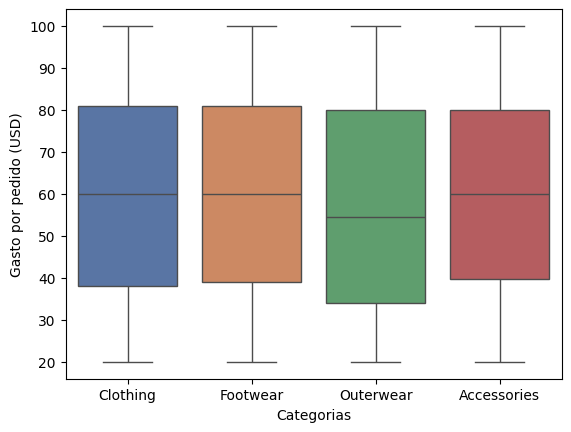

In [23]:
### mediante boxplot
# utilizando la libreria sns
sns.boxplot(x="Category",y="Purchase Amount (USD)", data = df,palette="deep")
# añadir etiquetas (utilizar matplotlib)
plt.xlabel("Categorias")
plt.ylabel("Gasto por pedido (USD)")

Text(0, 0.5, 'Temporada')

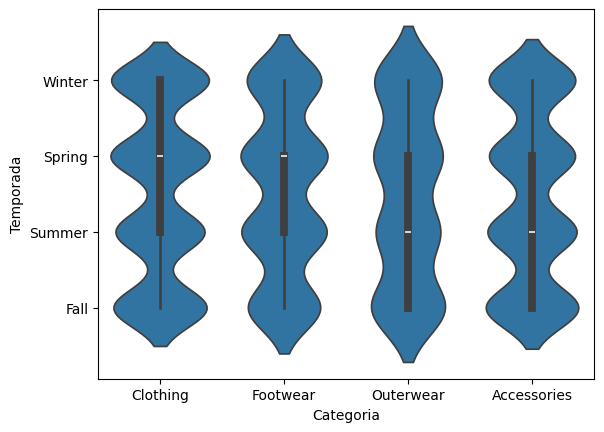

In [26]:
### box plot y violin plot
# utilizar el violin plot de sns
sns.violinplot(x = "Category", y= "Season", data = df)
# añadir etiquetas (utilizar matplotlib)
plt.xlabel("Categoria")
plt.ylabel("Temporada")

/tmp/ipython-input-99516943.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Season", y="Purchase Amount (USD)", data=seasonal_spending, palette="viridis")


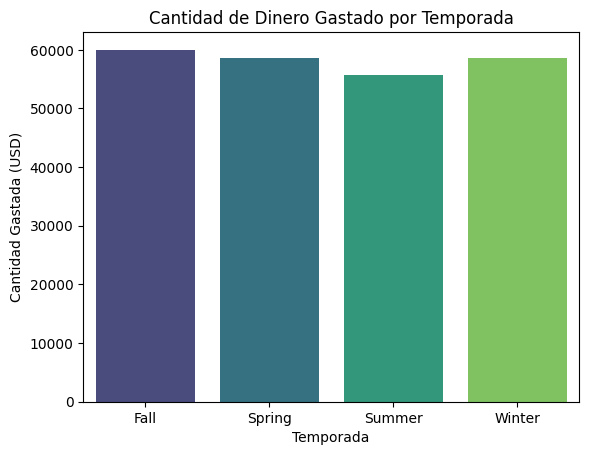

In [27]:
# Agrupar por temporada y sumar el monto de compra
seasonal_spending = df.groupby("Season")["Purchase Amount (USD)"].sum().reset_index()

# Crear un gráfico de barras
sns.barplot(x="Season", y="Purchase Amount (USD)", data=seasonal_spending, palette="viridis")

# Añadir etiquetas y título
plt.xlabel("Temporada")
plt.ylabel("Cantidad Gastada (USD)")
plt.title("Cantidad de Dinero Gastado por Temporada")
plt.show()

/tmp/ipython-input-2087910090.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Location", y="Number of Purchases", data=location_counts, palette="viridis")


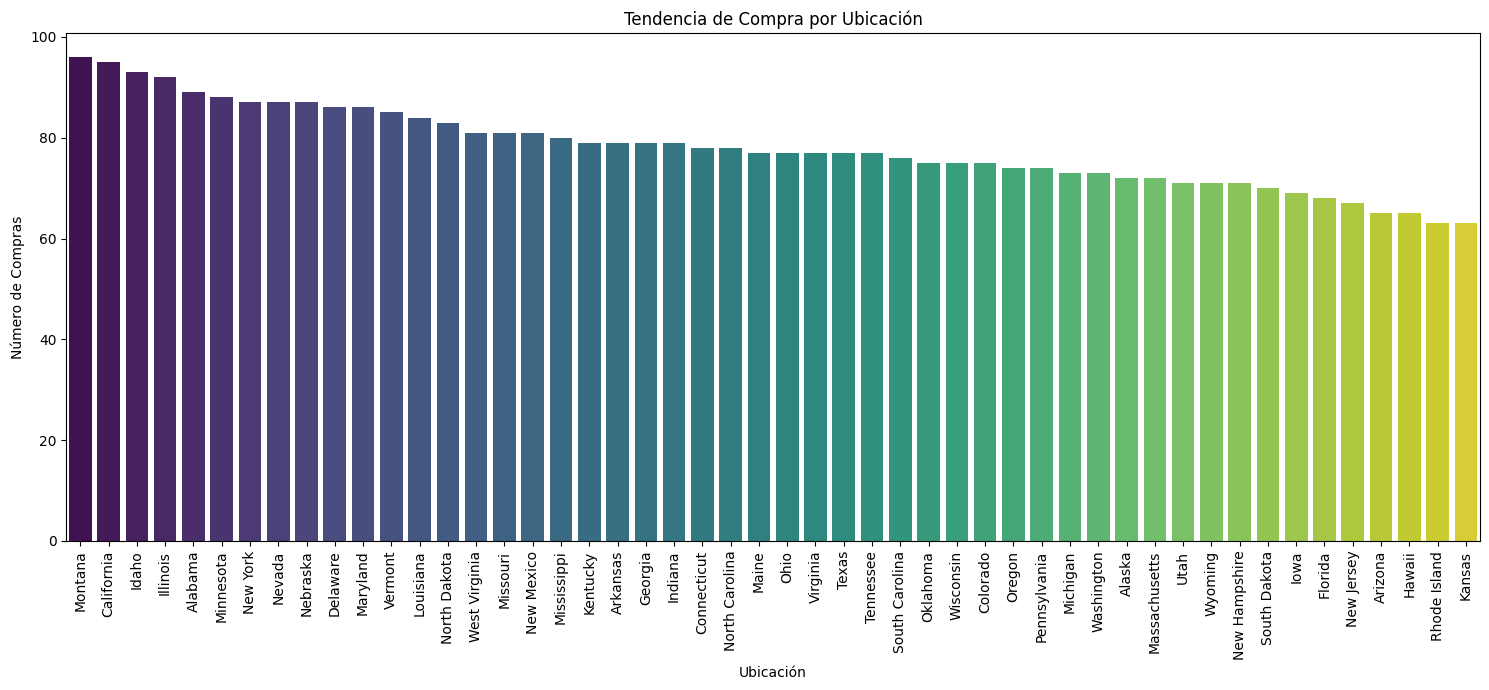

In [28]:
# Contar el número de compras por ubicación
location_counts = df["Location"].value_counts().reset_index()
location_counts.columns = ["Location", "Number of Purchases"]

# Crear un gráfico de barras para mostrar la tendencia de compra por ubicación
plt.figure(figsize=(15, 7)) # Aumentar el tamaño del gráfico para mejor visualización
sns.barplot(x="Location", y="Number of Purchases", data=location_counts, palette="viridis")

# Añadir etiquetas y título
plt.xlabel("Ubicación")
plt.ylabel("Número de Compras")
plt.title("Tendencia de Compra por Ubicación")
plt.xticks(rotation=90) # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()

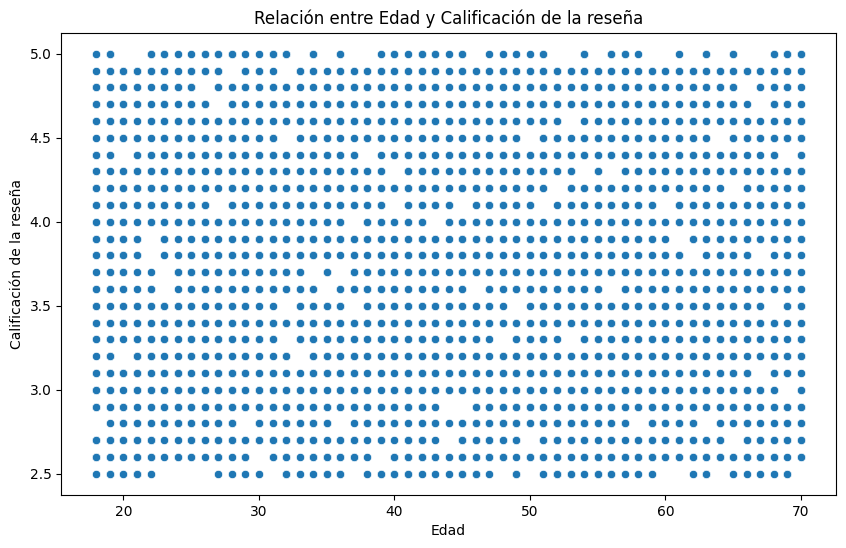

In [29]:
# Crear un gráfico de dispersión de Edad vs. Calificación de la reseña
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Review Rating", data=df)

# Añadir etiquetas y título
plt.xlabel("Edad")
plt.ylabel("Calificación de la reseña")
plt.title("Relación entre Edad y Calificación de la reseña")
plt.show()

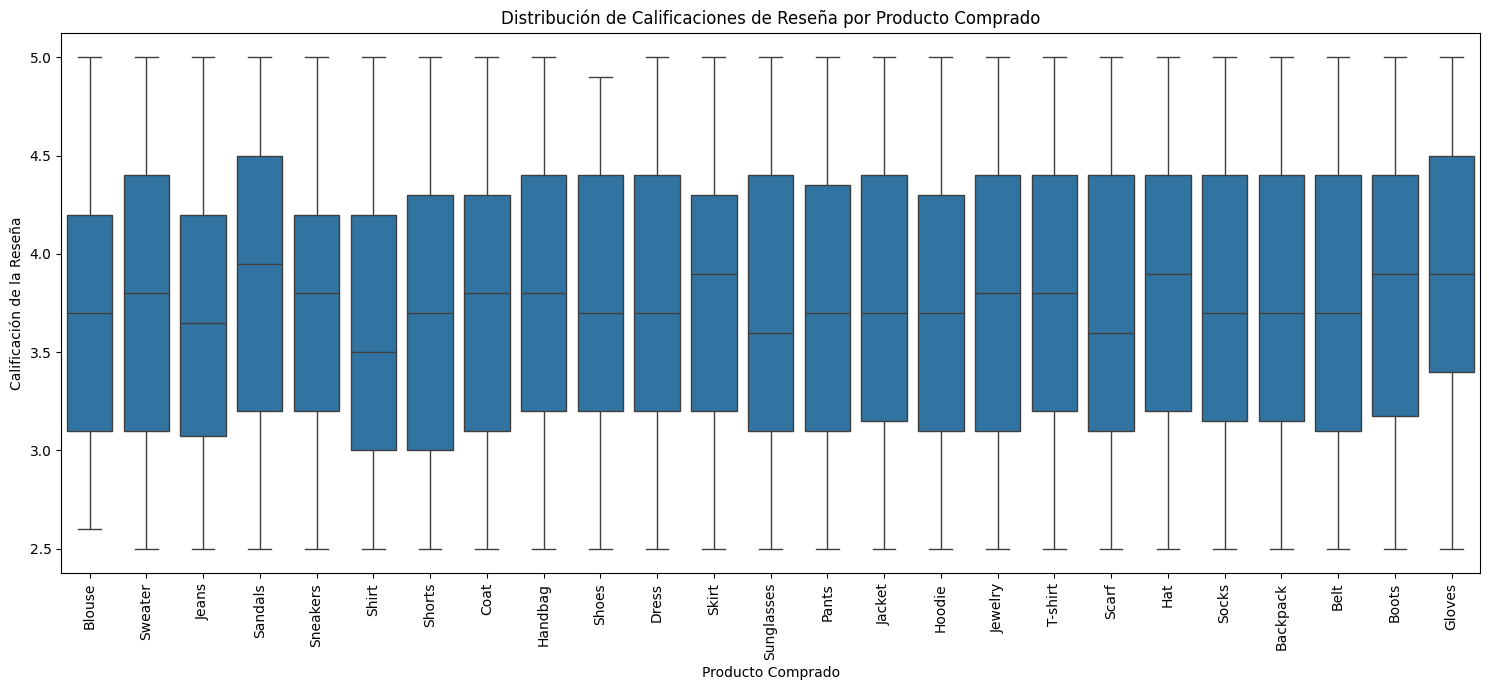

In [30]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Item Purchased", y="Review Rating", data=df)
plt.xlabel("Producto Comprado")
plt.ylabel("Calificación de la Reseña")
plt.title("Distribución de Calificaciones de Reseña por Producto Comprado")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()